# X90 Optimiser

This notebook is purely for the purpose of optimising the X90 pulse for a given transmon

optimal args for when λ is optimised for fidelity:
{'A': 15.236956382469863, 'τ': 0.24, 'λ': 2.3095911839100376, 'α': -199, 'ω01': 3981, 'φ': 0}

optimal args for when λ is optimised for leakage: $\lambda\approx30$ but then the final state is lost.

In [4]:
# imports
import numpy as np
from qutip import basis
from transmon_code.transmon import *
from transmon_code.optimise_X90 import *
from transmon_code.simulate import *

In [5]:
# define the transmon

tr = Transmon(n_levels=8, initial_state=0, Ω=3981, α=-199, RWA=False, dt=1/7000)

tr.X90_args = {'A': 15.237080809627912, 'τ': 0.24, 'λ': 2.3083668155364214, 'α': tr.α, 'ω01': tr.Ω, 'φ': 0}

Keeping A constant.
Optimising λ
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 


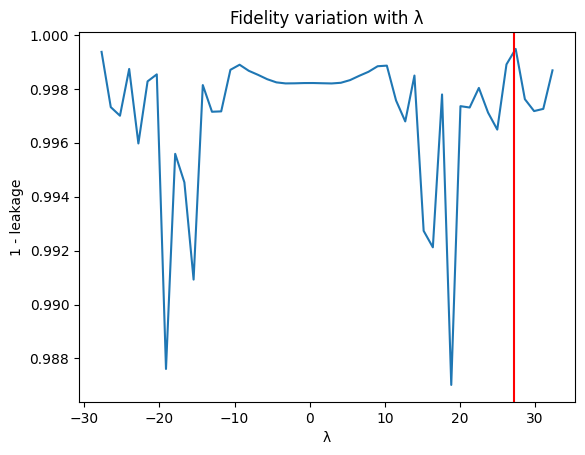

Optimal args:{'A': 15.237080809627912, 'τ': 0.24, 'λ': 27.131524734905213, 'α': -199, 'ω01': 3981, 'φ': 0}


In [6]:
# optimise the pulse

t = np.arange(0, tr.X90_args["τ"], tr.dt)
semiranges = {"A":0, "λ":30}

tr.X90_args = create_X90_pulse(tr, args=tr.X90_args, semiranges=semiranges, plot=True, rand_init=False, N=50)

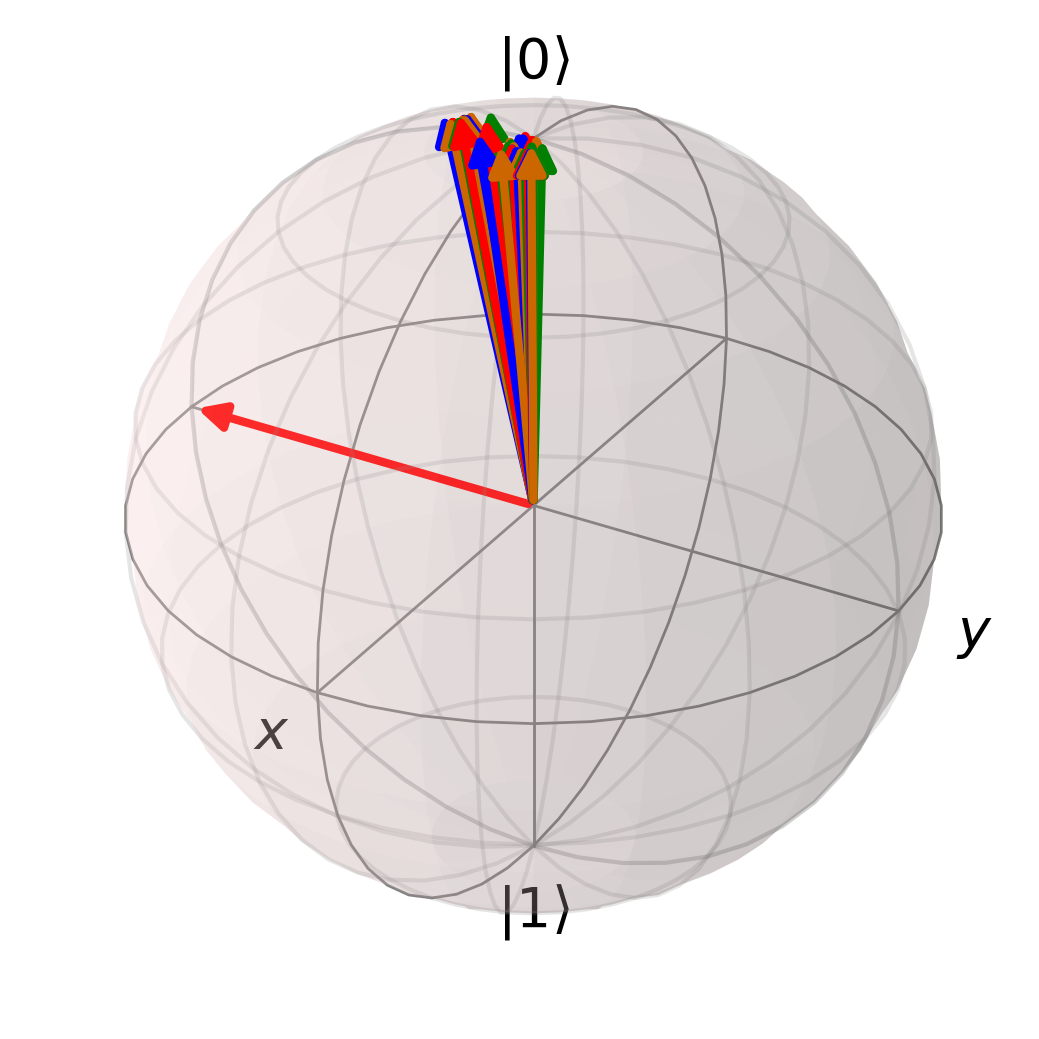

Fidelity (f):                0.6635622459054467
Measured error (1-f):        0.33643775409455334

Leakage error:               0.001882071389087635
Theoretical coherence error: 0.0
Error accounted for:         0.001882071389087635

Error unaccounted for:       0.3345556827054657


In [7]:
# check result
%matplotlib qt

# test from 0 to - (minus)
targ = (basis(tr.n_levels, 0)-1j*basis(tr.n_levels, 1)).unit()

# tr.dt = 1/100000
# tr.X90_args = {'A': 1, 'τg': 0.024, 'λ': 0, 'α': tr.α, 'ω': tr.Ω, 'φ': 0}

res, f = simulate(tr, tr.X90_args, target=targ, noise=False, plot=True)

break_down_errors(tr, tr.X90_args, res[-1], f)